<a href="https://colab.research.google.com/github/katusabevictoria/project-4-New-repo/blob/main/Project_4_Part_2_(Core)_Katusabe_Victoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project_4_Part_2_(Core)**

<a href="https://colab.research.google.com/github/othinAbbey/Project-4/blob/main/Onyango_Abbey_Project_4_Part_2_(Core)final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
filename = '/content/drive/MyDrive/Colab data uploads/adult.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [88]:

# Since the age column has many unique vales, this may cuase sparse data, lets deal with it
# Define the number of bins
num_bins = 6
# Create the bins
df['age_Binned'] = pd.cut(df['age'], bins=num_bins)
# the output is now categorical and lets label eoncode it
label_encoder = LabelEncoder()
df['age_Binned_Encoded'] = label_encoder.fit_transform(df['age_Binned'])

# Dropping the oridinal column
# Drop the original age column
df.drop('age', axis=1, inplace=True)
df.drop('age_Binned', axis=1, inplace=True)

In [89]:
df.dtypes

workclass             object
fnlwgt                 int64
education             object
educational-num        int64
marital-status        object
occupation            object
relationship          object
race                  object
gender                object
capital-gain           int64
capital-loss           int64
hours-per-week         int64
native-country        object
income                object
age_Binned_Encoded     int64
dtype: object

**encoding work calss column**

In [90]:
df['workclass'].isnull().sum()

# Apply Label Encoding
label_encoder = LabelEncoder()
df['workclass_encoded'] = label_encoder.fit_transform(df['workclass'])
df.drop('workclass', axis=1, inplace=True)

In [91]:
df['workclass_encoded'].unique()

array([4, 2, 0, 6, 1, 7, 5, 8, 3])

Dealing with the fnlwgt column

In [92]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [93]:
# Encoding the Education column
# Apply Label Encoding
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['education'])
df.drop('education',axis=1, inplace=True)

In [94]:
# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=['marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

# Splitting the data

In [95]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Imputing the missing values in the trainin set

In [96]:
# Impute missing values in training set
imputer = SimpleImputer(strategy='most_frequent')  # You can choose a suitable imputation strategy
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_scaled), columns=X_train.columns)

In [97]:
# Impute missing values in testing set (using the same imputer)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_scaled), columns=X_test.columns)

In [98]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

Apply PCA to get 3 principal components for the data. Concatenate/combine these PC’s with the original features (X_train, X_test data).

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Fit PCA on training data
pca = PCA(n_components=3)
pca.fit(X_train_imputed)

# Transform training and testing data
X_train_pca = pca.transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

# Concatenate principal components with original features
X_train_combined = np.concatenate((X_train, X_train_pca), axis=1)
X_test_combined = np.concatenate((X_test, X_test_pca), axis=1)


Apply clustering

In [100]:
from sklearn.cluster import KMeans
import pandas as pd
# Define the number of clusters (you may need to adjust this)
num_clusters = 3

# Fit KMeans only on the training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_combined)


# Get cluster labels for training and test data
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(X_test_combined)

# Convert cluster labels to one-hot encoding
train_cluster_labels_onehot = pd.get_dummies(train_cluster_labels, prefix='cluster')
test_cluster_labels_onehot = pd.get_dummies(test_cluster_labels, prefix='cluster')

# Concatenate cluster labels with original features
X_train_clustered = pd.concat([X_train, train_cluster_labels_onehot], axis=1)
X_test_clustered = pd.concat([X_test, test_cluster_labels_onehot], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [101]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train_clustered = imputer.fit_transform(X_train_clustered)
X_test_clustered = imputer.fit_transform(X_train_clustered)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [103]:
# Train Random Forest model
rf_model_with_pca = RandomForestClassifier(random_state=42)
rf_model_with_pca.fit(X_train_combined, y_train)

# Make predictions
y_pred_with_pca = rf_model_with_pca.predict(X_test_combined)

# Evaluate model performance
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)


In [104]:
from sklearn.feature_selection import SelectFromModel

# Create feature selector using Random Forest
feature_selector = SelectFromModel(RandomForestClassifier(random_state=42))

# Fit feature selector on combined data
feature_selector.fit(X_train_combined, y_train)

# Transform data
X_train_selected = feature_selector.transform(X_train_combined)
X_test_selected = feature_selector.transform(X_test_combined)


In [105]:
# Train Random Forest model with selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate model performance
accuracy_selected_features = accuracy_score(y_test, y_pred_selected)


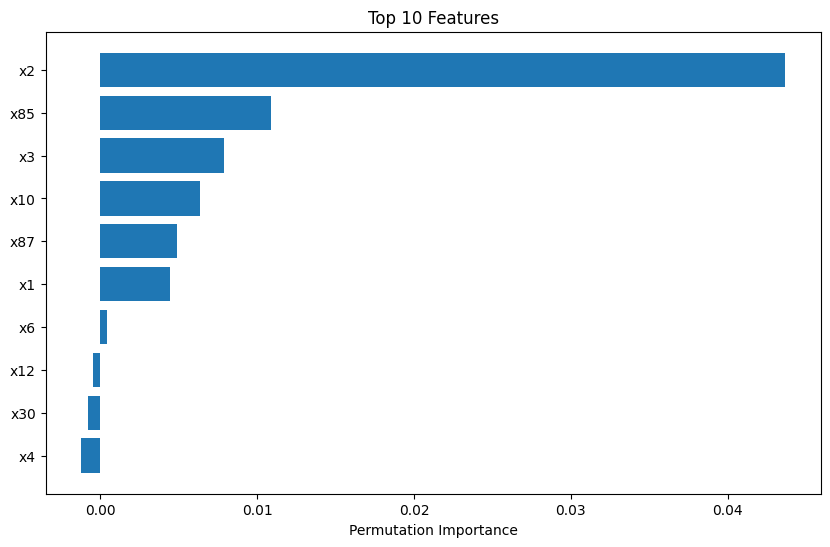

In [106]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
result = permutation_importance(rf_model_selected, X_test_selected, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(10), X_test_selected.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features')
plt.show()


In [107]:
# Train Random Forest model with selected features
rf_model_selected_features = RandomForestClassifier(random_state=42)
rf_model_selected_features.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected_features = rf_model_selected_features.predict(X_test_selected)

# Evaluate model performance
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)

print("Accuracy with selected features:", accuracy_selected_features)


Accuracy with selected features: 0.8551540587572934


Extract and visualize the top 10 features using permutation importance (from Intro to ML Week 4).


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
result = permutation_importance(rf_model_selected_features, X_test_selected, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[-10:]

# Visualize top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(10), [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Features')
plt.show()
